# Final Project
### Rishi Gummakonda - BIS 397, Spring 2021

## Introduction:
<p>Basketball is my favorite sport. At its core, its a game for kids. But to me, and so many people, its a lot more. Everything about it is capitvating: the offense, the defense, the personalities, the culture, and especially the passion. I could go on and on. Even though I was never blessed with the physical gifts or work ethic to take my playing skills anywhere besides the driveway or the local park, it would still be a dream to go to the NBA. </p>

A couple of years ago I found the website for the [2019 NBA Hackathon](https://hackathon.nba.com). The hackathon has two prompts, one for basketball analytics, another for business. This project will be based on the business prompt from the 2019 NBA Hackathon. 

The business prompt and dataset were originally on the hackathon's webpage but have since been removed. Even though I never ended up enrolling in the competition, I downloaded all the prompts and datasets. The original business prompt can be found on the following link:  (https://drive.google.com/file/d/1sXCpQhgL0pvTSDY_grhz1EN7ItBLPB0a/view?usp=sharing).

The NBA complied in a training dataset of 7,766 (real) Instagram posts by @nba starting from 10/01/2017 (1,595 individual photos, 713 photo albums, and 5,458 videos). 

The training set can be found on the following link:(https://drive.google.com/file/d/1nljN5HI6Sb7YTegEUF0CSzl3bPLg7wR3/view?usp=sharing).

In [1]:
#Import pandas to read in dataset
import pandas as pd

#for basic numerical functions 
import numpy as np


In [2]:
#Read in training set 
training = pd.read_csv('/Users/rishigummakonda/Desktop/BIS 397/final/training_set.csv',encoding='mac_roman')

#Renaming Followers at Posting to followers for clairity:
training = training.rename(columns={"Followers at Posting": "followers"})

Here I am previewing the dataset to see what kind of features are in the dataset:

In [3]:
training.head()

,Engagements,followers,Created,Type,Description
0,502093,36984682,2019-05-21 23:30:51 EDT,Video,The @raptors bench trio of @sergeibaka @norman...
1,603380,36984682,2019-05-21 22:53:33 EDT,Video,@kyle_lowry7 pulls from deep for the @raptors ...
2,603380,36984682,2019-05-21 22:19:58 EDT,Video,@k_mid22 with some english on the @bucks dime!
3,725100,36984682,2019-05-21 22:02:41 EDT,Video,Kawhi punches it home with the left on TNT!
4,661446,36984682,2019-05-21 20:47:49 EDT,Video,@giannis_an34 goes baseline early to rock the ...


<ol>
<li>Engagements: Instagram "engagement" numbers are the sum of likes, comments, and saves on a certain post. According to the NBA, the engagement numbers are not real, they are artficially generated.There’s no (intentional) correlation with the real-life engagement totals belonging to posts by @nba.</li>
<li>followers: number of followers at the time of posting</li>
<li>Created: Datetime stamp of post (Eastern time)</li>
<li>Type: Classification of post as Individual Photo, Photo Album, or Video</li>
<li>Description: @nba‘s post caption / description of the post / commentary on the event displayed in the post.</li>
</ol>

 The numerical variables are Engagments, and Followers at Posting. Categorical variables are Created, Type, and Description.

<p> The data provided can provide many insights regarding what makes NBA instagram posts popular or unpopular. Using AI to determine the factors that drive engagement allows the NBA to be more efficent with their marketing. With the insights, they can tailor their strategy to make mosts more engaging, and ultimately boost the NBA brand.  Instagram is especially great for advertisting a product. AI can play a powerful role in marketing, and the NBA should utilize it to its benefit.</p>

<p> There are many factors that may drive a post engagement that are not included within the dataset. There may be specific events or time periods that may drive or stifle engagement, or determine the kind of posts the NBA chooses to display. For example, when Kobe Bryant suddenly died over a year ago, the NBA's instagram centered around his legacy. This defintely effected engagement numbers abnormally. This would be a greater issue if the engagement numbers given by the NBA were not artificially generated. However, because engagements are artifically generated, it can be assumed that any other factors that may drive engagement are not relevant. Despite the engagements being fake, it can be reasonably assumed that they are close to the real numbers because the NBA want the analysis of the data to make sense to the hackathon participants.</p>

# AI Business Question
**Can we accurately predict Engagment numbers for a random sample of a 1000 NBA instagram posts given the number of Followers, Type of post, time posted, and caption descriptions?**

The original prompt asks the contestant to predict the Engagements for each of the 1000 posts in the holdout set. The training set can be used to train the models so the models can get accurate results on the test set. This can be done through regression models, particularly linear regression. The success measure of choice is Mean Absolute Percentage Error (MAPE) on Engagements. A description is below:

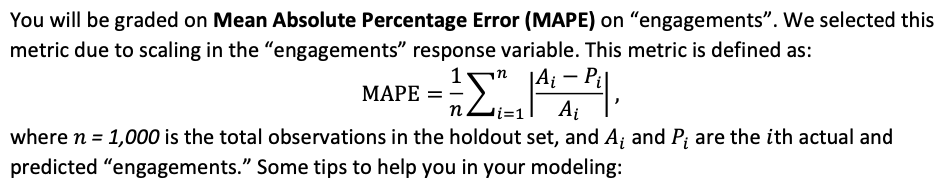

<p>All of the numerical features can be used for this prompt. Categorical varibles can be transformed to numerical representations. This is demonstrated above as the Created datetime value was changed to be represented by indivual month, hour and day of the week. In this scenario, Engagements would be the target varible (dependent variable). All others would be independent variables.</p>

**A subquestion within this prompt is: Can we determine what the optimal features are for an Instagram post?** This may be difficult to answer because there are many variables within the real world that may drive Instagram engagement.

I believe a decent MAPE score would be around or under 5%, as a 95% success rate is a commonly referenced percetnage in statistics. Even though the dataset is limited, cleaning the data and creating custom features using the dataset and outside knowledge can make this goal attainable.

MAPE is a metric to measure the accuracy of a regression model. Given the limited time for the project, I will solely be implementing Linear Regression Models with varying features using skLearn. In this process, we will also determine what features within the dataset are the most important in driving Engagements.

## Data Cleaning and Feature Engineering:

In [4]:
training.dtypes

Engagements     int64
followers       int64
Created        object
Type           object
Description    object
dtype: object

In the code above we see that Created is an object. To analyze the data, I decided to turn it into a datetime object and break it down into month, weekdays, and hours. We can use this data to see if it correlates to greater engagements.

In [5]:
training['Created'] = pd.to_datetime(training['Created'])
training['month'] = training.Created.dt.month
training['weekday'] = training.Created.dt.weekday
training['hour'] = training.Created.dt.hour

In [6]:
dummies= pd.get_dummies(training)
training['isAlbum']= dummies['Type_Album']
training['isPhoto']= dummies['Type_Photo']
training['isVideo']= dummies['Type_Video']

Above we are creating dummies variables for the Type varible. This turns the categorical variable into a numerical variable that can be used in regression.

In [7]:
#length of description
training['len_des'] = training['Description'].str.len()

The code above outputs the length of the description into a new column.

In [8]:
training['tags'] = training['Description'].str.count("@")
training.tags.value_counts().head()*100/7766

2.0    35.745558
1.0    30.775174
0.0    19.456606
3.0     8.910636
4.0     3.322174
Name: tags, dtype: float64

The code above creates a feature that counts how many times there is another account tagged into the description.

In [9]:
training['count_nba_wnba'] = training['Description'].str.count('@nba') + training['Description'].str.count('@wnba')
training.count_nba_wnba.value_counts()*100/7766

0.0    85.642544
1.0    13.868143
2.0     0.296163
3.0     0.012877
Name: count_nba_wnba, dtype: float64

In [10]:
training['emojis'] = training['Description'].str.count('\ ?? ')
print(training.emojis.value_counts().head()*100/7766)

6.0    9.541592
7.0    8.511460
8.0    8.112284
5.0    8.086531
9.0    7.584342
Name: emojis, dtype: float64


In [11]:
training['kyrie'] = training['Description'].str.count('@kyrieirving')
training['lebron'] = training['Description'].str.count('@kingjames')
training['giannis'] = training['Description'].str.count('@giannis_an34')
training['joel'] = training['Description'].str.count('@joelembiid')
training['steph'] = training['Description'].str.count('@stephencurry30')
training['harden'] =training['Description'].str.count('@jharden13')
training['kd'] = training['Description'].str.count('@easymoneysniper')

In [12]:
training['topFive18'] = training['steph'] + training['lebron'] + training['kd']  + training['giannis'] + training['kyrie']
training.topFive18.value_counts()*100/7766

0.0    86.595416
1.0    12.812259
2.0     0.399176
3.0     0.012877
Name: topFive18, dtype: float64

In [13]:
training['stars'] = training['topFive18']+training['harden'] +training['joel']+  training['Description'].str.count('@antdavis23') + training['Description'].str.count('@boogiecousins')+ training['Description'].str.count('@ygtrece') + training['Description'].str.count('@demar_derozan') +training['Description'].str.count('@_kw15')+training['Description'].str.count('@jimmybutler')+training['Description'].str.count('@ygtrece')
training.stars.value_counts()*100/7766

0.0    78.817924
1.0    19.237703
2.0     1.699717
3.0     0.064383
Name: stars, dtype: float64

## Exploratory Data Analysis

In [15]:
training.Type.value_counts()

Video    5458
Photo    1595
Album     713
Name: Type, dtype: int64

In [16]:
print("Percentage of Total Dataset:")
print((training.Type.value_counts()*100/7766).round(2))

Percentage of Total Dataset:
Video    70.28
Photo    20.54
Album     9.18
Name: Type, dtype: float64


In [17]:
print("Average Video Followers at Posting:",np.mean(training[training['Type']=='Video']['followers']))
print("Average Photo Followers at Posting:",np.mean(training[training['Type']=='Photo']['followers']))
print("Average Album Followers at Posting:",np.mean(training[training['Type']=='Album']['followers']))

Average Video Followers at Posting: 30340952.7425797
Average Photo Followers at Posting: 30551143.04952978
Average Album Followers at Posting: 30815575.74053296


In [18]:
print("Average Video Length of Description:",np.mean(training[training['Type']=='Video']['len_des']))
print("Average Photo Length of Description:",np.mean(training[training['Type']=='Photo']['len_des']))
print("Average Album Length of Description:",np.mean(training[training['Type']=='Album']['len_des']))

Average Video Length of Description: 65.7011557512383
Average Photo Length of Description: 79.63413098236776
Average Album Length of Description: 72.47826086956522


In [19]:
print("Average Video Engagements:",np.mean(training[training['Type']=='Video']['Engagements']))
print("Average Photo Engagements:",np.mean(training[training['Type']=='Photo']['Engagements']))
print("Average Album Engagements:",np.mean(training[training['Type']=='Album']['Engagements']))

Average Video Engagements: 692773.5756687431
Average Photo Engagements: 357547.36363636365
Average Album Engagements: 348465.3394109397


In [20]:
print("LeBron James Number of Posts:",np.ma.count(training[training['lebron']>0]['Engagements']))
print("LeBron James Average Engagements:",np.mean(training[training['lebron']>0]['Engagements']))
print("\nSteph Curry Number of Posts:",np.ma.count(training[training['steph']>0]['Engagements']))
print("Stephen Curry Average Engagements:",np.mean(training[training['steph']>0]['Engagements']))
print("\nKyrie Irving Number of Posts:",np.ma.count(training[training['kyrie']>0]['Engagements']))
print("Kyrie Irving Average Engagements:",np.mean(training[training['kyrie']>0]['Engagements']))
print("\n2017-2018 Top Five Jersey Sales Number of Posts:",np.ma.count(training[training['topFive18']>0]['Engagements']))
print("2017-2018 Top Five Jersey Sales Average Engagements:",np.mean(training[training['topFive18']>0]['Engagements']))
print("\nNBA All Star Starters 2017 & 2018 Number of Posts:",np.ma.count(training[training['stars']>0]['Engagements']))
print("NBA All Star Starters 2017 & 2018 Sales Average Engagements:",np.mean(training[training['stars']>0]['Engagements']))

LeBron James Number of Posts: 417
LeBron James Average Engagements: 780689.7026378897

Steph Curry Number of Posts: 230
Stephen Curry Average Engagements: 705496.8

Kyrie Irving Number of Posts: 150
Kyrie Irving Average Engagements: 805191.34

2017-2018 Top Five Jersey Sales Number of Posts: 1027
2017-2018 Top Five Jersey Sales Average Engagements: 732989.0272638754

NBA All Star Starters 2017 & 2018 Number of Posts: 1631
NBA All Star Starters 2017 & 2018 Sales Average Engagements: 690564.30472103


In [21]:
training.describe()

,Engagements,followers,month,weekday,hour,isAlbum,isPhoto,isVideo,len_des,tags,...,emojis,kyrie,lebron,giannis,joel,steph,harden,kd,topFive18,stars
count,7.766000e+03,7.766000e+03,7766.000000,7766.000000,7766.000000,7766.000000,7766.000000,7766.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,5.923129e+05,3.042770e+07,5.996652,3.081767,15.925444,0.091810,0.205382,0.702807,69.178664,1.511739,...,9.137255,0.019479,0.053922,0.024897,0.014706,0.029670,0.027993,0.008772,0.136739,0.228715
std,1.792682e+05,3.748957e+06,3.910491,1.970062,7.319283,0.288777,0.404007,0.457052,37.060662,1.123340,...,5.596850,0.139140,0.226448,0.155821,0.120381,0.169686,0.164963,0.093253,0.356132,0.462988
min,1.278160e+05,2.487554e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173900e+05,2.698910e+07,3.000000,1.000000,12.000000,0.000000,0.000000,0.000000,44.000000,1.000000,...,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.397285e+05,3.004747e+07,5.000000,3.000000,19.000000,0.000000,0.000000,1.000000,63.000000,1.000000,...,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.216282e+05,3.392854e+07,10.000000,5.000000,21.000000,0.000000,0.000000,1.000000,88.250000,2.000000,...,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.129585e+06,3.698468e+07,12.000000,6.000000,23.000000,1.000000,1.000000,1.000000,639.000000,10.000000,...,104.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000


In [22]:
#basic data visualization of Type of posts vs. Engagement
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

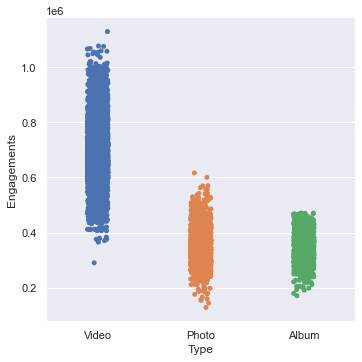

In [23]:
sns.catplot(x="Type", y="Engagements", data=training)

<AxesSubplot:xlabel='month', ylabel='Engagements'>

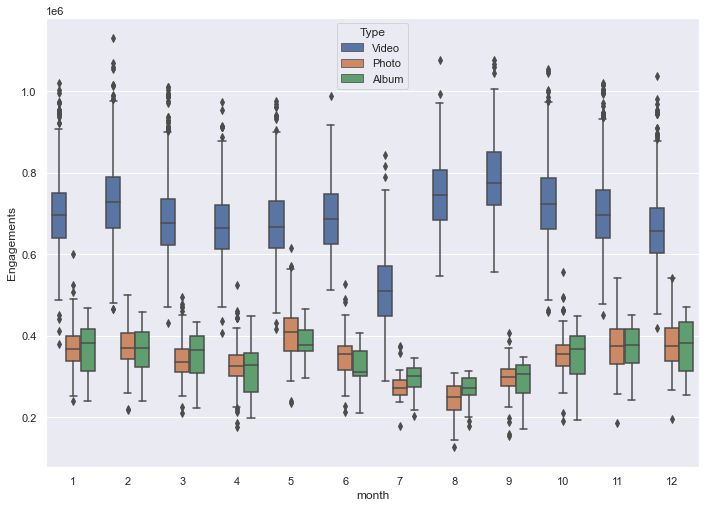

In [24]:
sns.boxplot(x="month", y="Engagements", data=training, hue="Type")

<AxesSubplot:xlabel='weekday', ylabel='Engagements'>

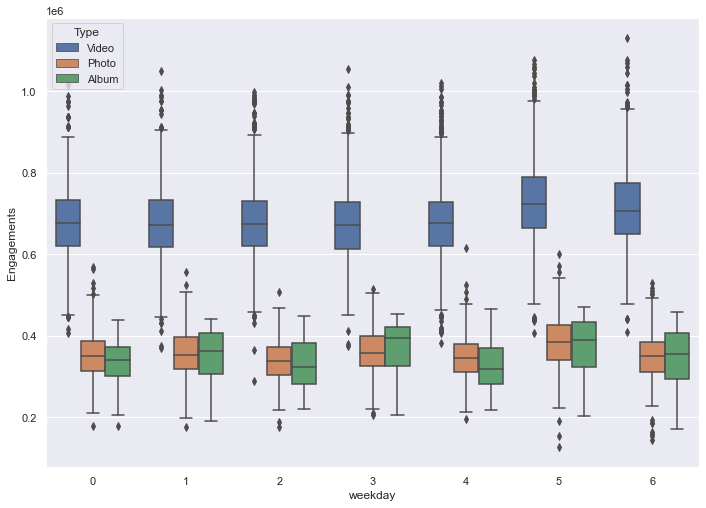

In [25]:
sns.boxplot(x="weekday", y="Engagements", data=training, hue="Type")

<AxesSubplot:xlabel='hour', ylabel='Engagements'>

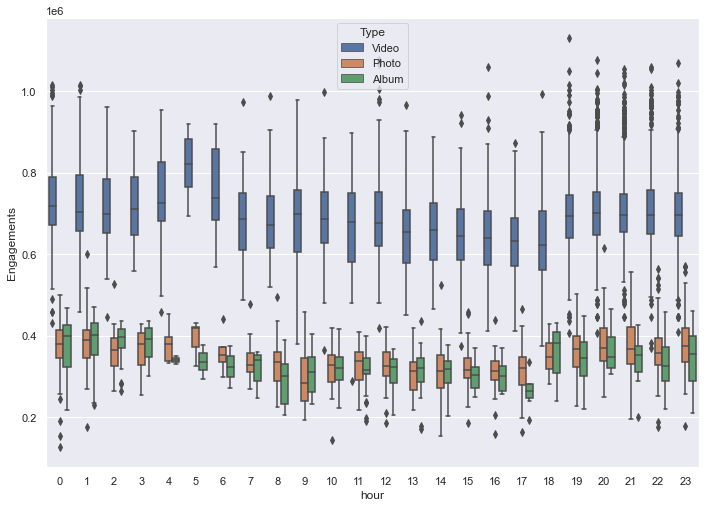

In [26]:
sns.boxplot(x="hour", y="Engagements", data=training, hue="Type")

<AxesSubplot:xlabel='followers', ylabel='Engagements'>

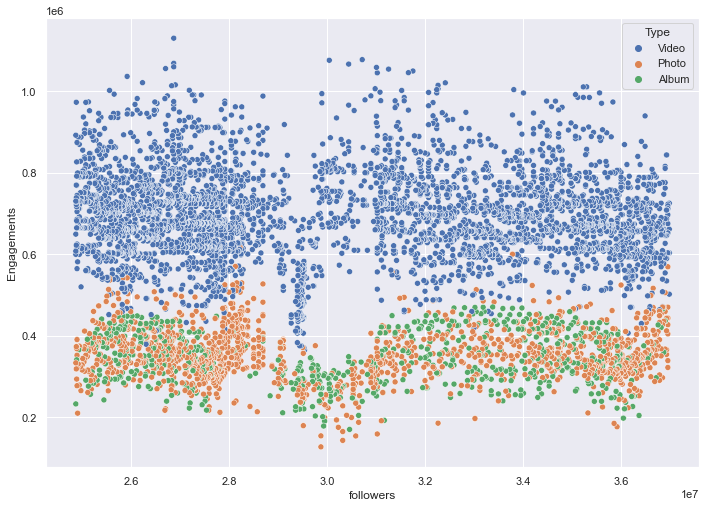

In [50]:
sns.scatterplot(x="followers", y="Engagements", hue="Type", data=training)

<AxesSubplot:xlabel='followers', ylabel='Engagements'>

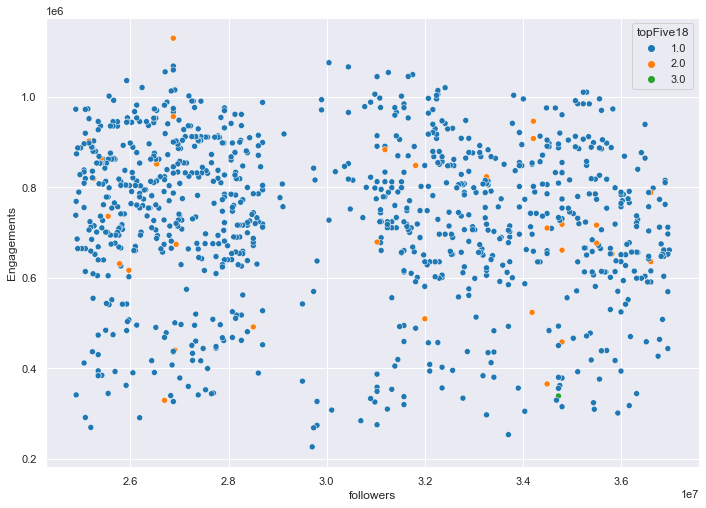

In [67]:
sns.scatterplot(x="followers", y="Engagements", hue="topFive18", data=training[training['topFive18']>0], palette='tab10')

<AxesSubplot:xlabel='Created', ylabel='Engagements'>

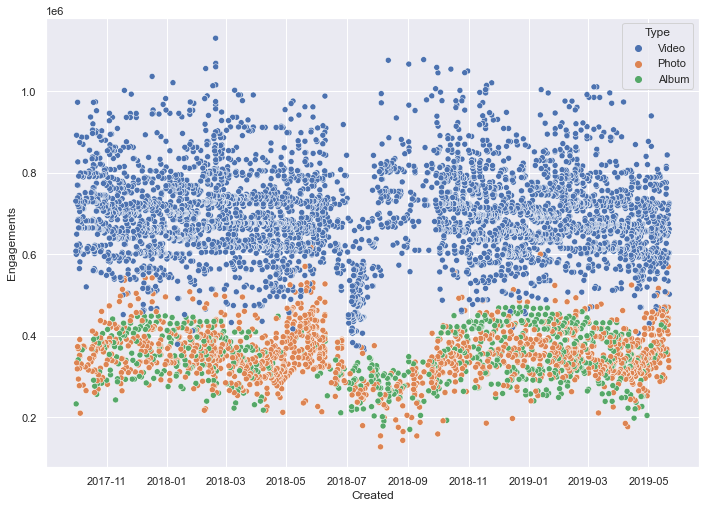

In [28]:
sns.scatterplot(="Engagements", y="Created", hue= "Type", data=training)

In [29]:
#listing the correlation values
correlation_mat = training.corr()

corr_pairs = correlation_mat.unstack()

#sorting
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

#only looking at pairs that go with total revenue
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.245][['Engagements']]
strong_pairs_no1 = strong_pairs[abs(sorted_pairs) < 1]
print(strong_pairs_no1)

#only looking at pairs that go with total revenue
strong_pairs2 = sorted_pairs[abs(sorted_pairs) > 0.5]
strong_pairs_no2 = strong_pairs2[abs(sorted_pairs) < 1]
print(strong_pairs_no2)

Engagements  isPhoto     -0.665827
             isAlbum     -0.432515
             len_des     -0.276022
             emojis      -0.246733
             lebron       0.249850
             stars        0.256820
             topFive18    0.298033
             isVideo      0.861826
dtype: float64
isPhoto      isVideo       -0.781810
isVideo      isPhoto       -0.781810
isPhoto      Engagements   -0.665827
Engagements  isPhoto       -0.665827
topFive18    lebron         0.599671
lebron       topFive18      0.599671
topFive18    stars          0.711696
stars        topFive18      0.711696
Engagements  isVideo        0.861826
isVideo      Engagements    0.861826
len_des      emojis         0.947188
emojis       len_des        0.947188
dtype: float64


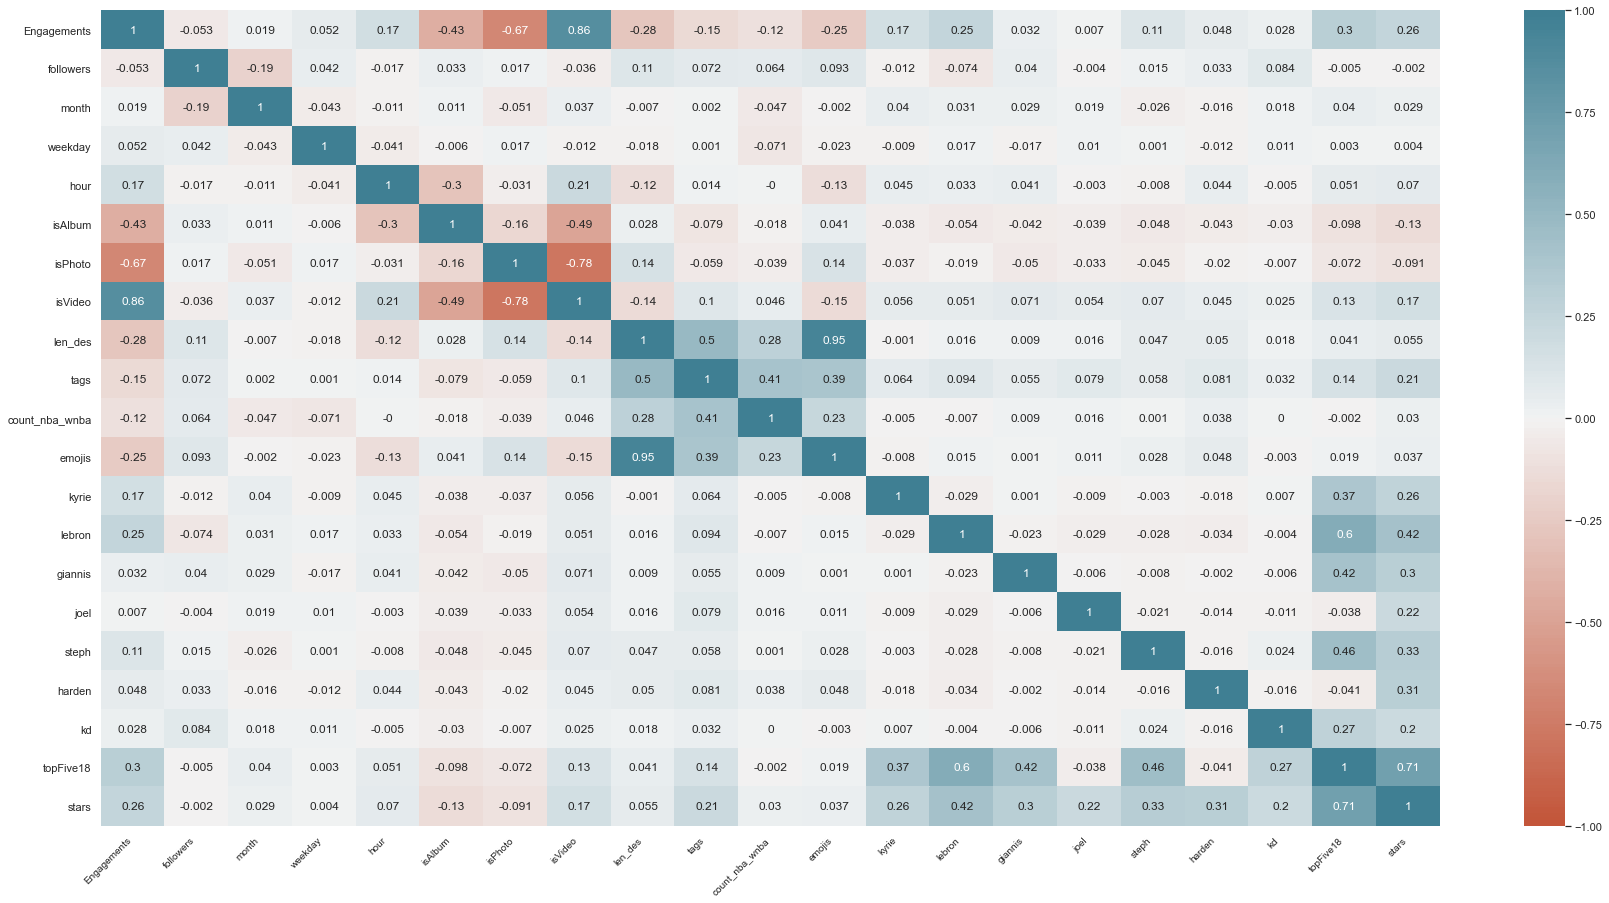

In [30]:
plt.figure(figsize=(30,15))
ax3 = sns.heatmap(training.corr().round(3),vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), 
                  square=False, annot=True, annot_kws={"size": 12})

ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10);

## Modeling

In [31]:
import sklearn
from sklearn import metrics
from sklearn.metrics import (explained_variance_score,r2_score) 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils

In [32]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [33]:
def linReg(x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=42)
    lm = LinearRegression(fit_intercept=True)
    lm.fit(X_train, y_train)
    actual = list(y_test)
    predicted = list(lm.predict(X_test))
    print('Number of coefficients: {}'.format(len(lm.coef_)))
    print("MAPE:",mean_absolute_percentage_error(actual,predicted).round(2))
    print(pd.DataFrame({'features': X_train.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']])

In [34]:
#Base line
training= training.fillna(0)
y = training['Engagements']
x = training[['followers','month','weekday','hour','isPhoto','isAlbum','isVideo']]
linReg(x,y)

Number of coefficients: 7
MAPE: 12.5
    features  estimatedCoefficients
0  followers              -0.001436
1      month            -619.468020
2    weekday            5790.361108
3       hour            -425.965374
4    isPhoto         -109412.546090
5    isAlbum         -118124.261787
6    isVideo          227536.807877


In [35]:
#Only Type
y = training['Engagements']
x = training[["isAlbum","isPhoto","isVideo"]]
linReg(x,y)

Number of coefficients: 3
MAPE: 12.54
  features  estimatedCoefficients
0  isAlbum           8.392965e+17
1  isPhoto           8.392965e+17
2  isVideo           8.392965e+17


In [36]:
#Only Time factors
y = training['Engagements']
x = training[["month","hour","weekday", "followers"]]
linReg(x,y)

Number of coefficients: 4
MAPE: 31.69
    features  estimatedCoefficients
0      month             358.841270
1       hour            4025.984775
2    weekday            5053.554305
3  followers              -0.003424


In [37]:
#Only features from the Description
y = training['Engagements']
x = training[['len_des', "tags", "count_nba_wnba", "stars", 'topFive18', "emojis"]]
linReg(x,y)

Number of coefficients: 6
MAPE: 29.7
         features  estimatedCoefficients
0         len_des           -1756.895100
1            tags          -12197.293829
2  count_nba_wnba           -7089.045936
3           stars           46137.240570
4       topFive18          114078.921418
5          emojis            3970.655637


In [38]:
#Time, Type, Description Features, and Top Five Jersey Sales Players
training['len_des'] = training['len_des'].fillna(0)
y = training['Engagements']
x = training[['month','hour', "weekday",'isPhoto', "isAlbum",'len_des', "tags", "count_nba_wnba","emojis", "topFive18"]]
linReg(x,y)

Number of coefficients: 10
MAPE: 9.4
         features  estimatedCoefficients
0           month            -997.443093
1            hour            -566.241605
2         weekday            5381.975598
3         isPhoto         -334890.435006
4         isAlbum         -347670.091052
5         len_des            -451.959909
6            tags          -38036.590502
7  count_nba_wnba          -20448.180050
8          emojis            2167.020240
9       topFive18          112445.097816


In [39]:
#All Features
training= training.fillna(0)
y = training['Engagements']
x = training.drop(['Engagements','Created', 'Description', "Type"], axis=1)
linReg(x,y)

Number of coefficients: 20
MAPE: 8.75
          features  estimatedCoefficients
0        followers               0.000478
1            month            -849.096486
2          weekday            5139.655736
3             hour            -664.126957
4          isAlbum         -120515.077321
5          isPhoto         -108540.644322
6          isVideo          229055.721643
7          len_des            -300.989692
8             tags          -39831.464564
9   count_nba_wnba          -19904.201837
10          emojis            1226.143556
11           kyrie          105325.795374
12          lebron          113778.650911
13         giannis          -80634.785010
14            joel          -12889.387171
15           steph           -5790.116416
16          harden           51721.144796
17              kd          -54485.489803
18       topFive18           78194.055056
19           stars           -2569.231775


### Final Feature Selection

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

training= training.fillna(0)
y = training['Engagements']
x = training.drop(['Engagements','Created', 'Description', "Type"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=42)
lm = LinearRegression(fit_intercept=True)
lm.fit(X_train, y_train)
actual = list(y_test)
predicted = list(lm.predict(X_test))

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
    fss = (i, fs.scores_[i])
    print('Feature %d: %f' % fss)
    

Feature 0: 30.256291
Feature 1: 1.553005
Feature 2: 11.276477
Feature 3: 150.379946
Feature 4: 1174.111269
Feature 5: 4534.329338
Feature 6: 15655.529672
Feature 7: 437.999977
Feature 8: 134.313916
Feature 9: 81.127892
Feature 10: 349.567419
Feature 11: 131.140952
Feature 12: 353.176379
Feature 13: 9.315648
Feature 14: 0.031728
Feature 15: 70.344254
Feature 16: 10.983266
Feature 17: 1.593411
Feature 18: 499.408154
Feature 19: 363.660477


In [48]:
training= training.fillna(0)
y = training['Engagements']
x = training[['month','weekday','hour','isPhoto','isVideo','len_des','tags','count_nba_wnba','emojis','steph','lebron','kyrie']]
linReg(x,y)

Number of coefficients: 12
MAPE: 8.82
          features  estimatedCoefficients
0            month           -1003.238516
1          weekday            5066.566341
2             hour            -626.352774
3          isPhoto           12496.329755
4          isVideo          350163.597859
5          len_des            -294.418401
6             tags          -39447.679999
7   count_nba_wnba          -19513.809451
8           emojis            1271.770135
9            steph           69913.496747
10          lebron          187779.735022
11           kyrie          179249.134996


## Analysis and Conclusion